In [2]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
df=df.drop_duplicates()
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
# Create new columns
df['Transaction Hour'] = df['TransactionStartTime'].dt.hour
df['Transaction Day'] = df['TransactionStartTime'].dt.day
df['Transaction Month'] = df['TransactionStartTime'].dt.month
df['Transaction Year'] = df['TransactionStartTime'].dt.year

In [6]:
df['CountryCode'] = df['CountryCode'].astype(str)  # Ensure CountryCode is treated as a string

In [7]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId'],
      dtype='object')

In [8]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.columns

Index(['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Transaction Hour',
       'Transaction Day', 'Transaction Month', 'Transaction Year'],
      dtype='object')

In [9]:
# Define the columns for numerical and categorical features
numerical_features = ['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Transaction Hour','Transaction Day', 'Transaction Month', 'Transaction Year']
categorical_features = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId','ProductCategory', 'ChannelId']

# Create the preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler())                    # Normalize
])

# Create the preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with mode
])

# Combine both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)

# Convert the transformed data back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + categorical_features)

In [10]:
df_transformed

,Amount,Value,PricingStrategy,FraudResult,Transaction Hour,Transaction Day,Transaction Month,Transaction Year,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId
0,0.092004,0.000101,0.5,0.0,0.086957,0.466667,0.909091,0.0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3
1,0.09191,0.000002,0.5,0.0,0.086957,0.466667,0.909091,0.0,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2
2,0.091958,0.00005,0.5,0.0,0.086957,0.466667,0.909091,0.0,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3
3,0.09375,0.002206,0.5,0.0,0.130435,0.466667,0.909091,0.0,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3
4,0.091853,0.000065,0.5,0.0,0.130435,0.466667,0.909091,0.0,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.09182,0.000101,0.5,0.0,0.391304,0.4,0.090909,1.0,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95658,0.092004,0.000101,0.5,0.0,0.391304,0.4,0.090909,1.0,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3
95659,0.09191,0.000002,0.5,0.0,0.391304,0.4,0.090909,1.0,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95660,0.092188,0.000303,0.5,0.0,0.434783,0.4,0.090909,1.0,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3


In [11]:
le = LabelEncoder()
# Fit and transform the specified columns
columns_to_encode = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId','ProductCategory', 'ChannelId']
# Apply label encoding to each column individually
for column in columns_to_encode:
    df_transformed[column] = le.fit_transform(df_transformed[column])

In [12]:
df_transformed.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.0,95662.000000,95662.000000,95662.000000,95662.000000
mean,47830.500000,47406.038103,2332.942506,2059.692302,1961.152067,0.0,0.0,3.657157,12.388786,1.238726,1.611455
std,27615.385063,27374.865336,1021.762070,884.139292,1046.685310,0.0,0.0,1.309014,7.217021,1.550262,0.520326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,23915.250000,23684.250000,1548.000000,1538.000000,1131.000000,0.0,0.0,3.000000,6.000000,0.000000,1.000000
50%,47830.500000,47418.500000,2728.000000,2366.000000,1969.000000,0.0,0.0,4.000000,16.000000,2.000000,2.000000
75%,71745.750000,71095.750000,3219.000000,2467.000000,2891.000000,0.0,0.0,5.000000,19.000000,2.000000,2.000000
max,95661.000000,94808.000000,3632.000000,3626.000000,3741.000000,0.0,0.0,5.000000,22.000000,8.000000,3.000000


In [ ]:
df_transformed.drop(columns=['CurrencyCode','CountryCode'], inplace=True)

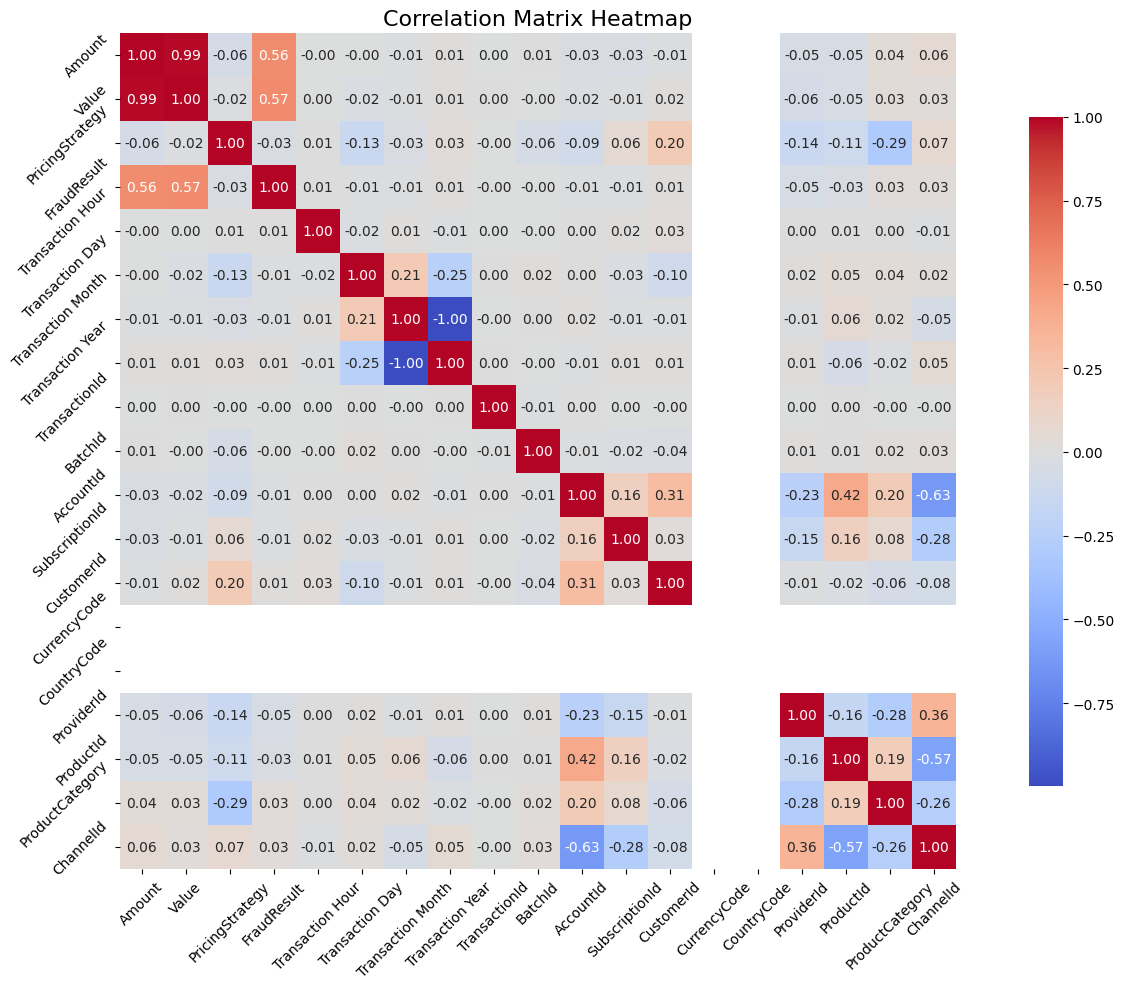

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_transformed.corr()
plt.figure(figsize=(15, 10))
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Normalization
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_transformed), columns=df_transformed.columns)

In [15]:
df_normalized.describe()

,Amount,Value,PricingStrategy,FraudResult,Transaction Hour,Transaction Day,Transaction Month,Transaction Year,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.00000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.0,95662.000000,95662.000000,95662.000000,95662.000000
mean,0.092529,0.001002,0.563994,0.002018,0.541205,0.496763,0.506021,0.497115,0.50000,0.500021,0.642330,0.568034,0.524232,0.0,0.0,0.731431,0.563127,0.154841,0.537152
std,0.011333,0.012462,0.183231,0.044872,0.210738,0.298761,0.474937,0.499994,0.28868,0.288740,0.281322,0.243833,0.279788,0.0,0.0,0.261803,0.328046,0.193783,0.173442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.091907,0.000028,0.500000,0.000000,0.347826,0.233333,0.000000,0.000000,0.25000,0.249813,0.426211,0.424159,0.302326,0.0,0.0,0.600000,0.272727,0.000000,0.333333
50%,0.092004,0.000101,0.500000,0.000000,0.565217,0.500000,0.909091,0.000000,0.50000,0.500153,0.751101,0.652510,0.526330,0.0,0.0,0.800000,0.727273,0.250000,0.666667
75%,0.092169,0.000506,0.500000,0.000000,0.739130,0.766667,1.000000,1.000000,0.75000,0.749892,0.886289,0.680364,0.772788,0.0,0.0,1.000000,0.863636,0.250000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


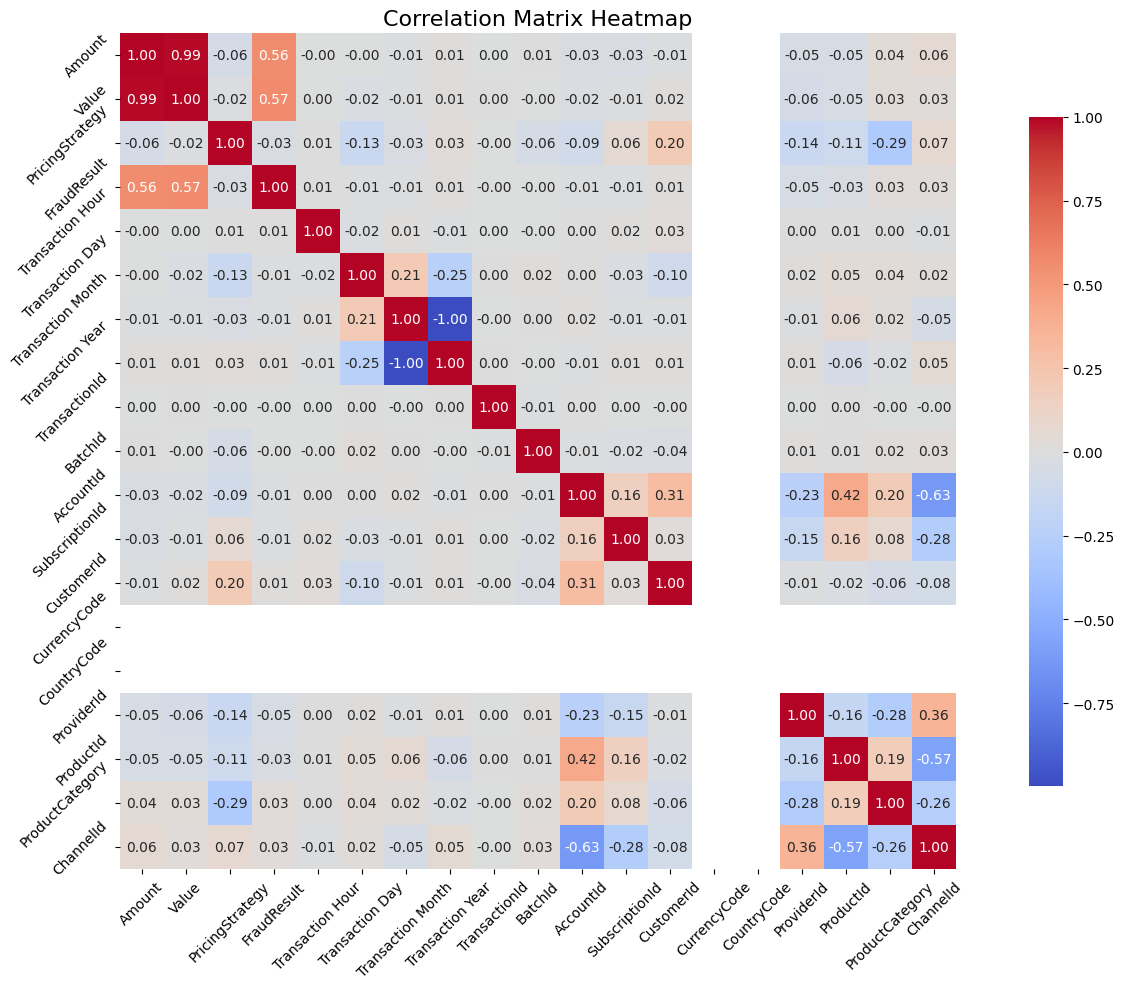

In [16]:
correlation_matrix = df_normalized.corr()
plt.figure(figsize=(15, 10))
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
df_normalized.to_csv('Final_preprocessed_data')

In [18]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# --- 1. Generate Sample Transaction Data ---
# In a real scenario, you would load your transaction data here.
df_transactions = pd.read_csv('Final_preprocessed_data.csv')

np.random.seed(42) # for reproducibility of synthetic data

num_customers = 95662
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)

data = []
for customer_id in range(1, num_customers + 1):
    # Simulate varying transaction frequencies and amounts
    num_transactions = np.random.randint(1, 30) # Customers can have 1 to 30 transactions
    for _ in range(num_transactions):
        random_days = np.random.randint(0, (end_date - start_date).days)
        transaction_date = start_date + timedelta(days=random_days)
        amount = np.random.uniform(10, 1000) # Transaction amounts between 10 and 1000
        data.append({'CustomerId': customer_id, 'TransactionDate': transaction_date, 'Amount': amount})

df_transactions = pd.DataFrame(data)

print("--- Sample Transaction Data ---")
print(df_transactions.head())
print(f"\nTotal transactions: {len(df_transactions)}")
print(f"Unique customers: {df_transactions['CustomerId'].nunique()}")

# --- 2. Calculate RFM Metrics ---

# Define a snapshot date: The day after the latest transaction in the dataset
snapshot_date = df_transactions['TransactionDate'].max() + timedelta(days=1)
print(f"\nSnapshot Date for Recency calculation: {snapshot_date}")

# Calculate RFM for each customer
rfm_df = df_transactions.groupby('CustomerId').agg(
    Recency=('TransactionDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('TransactionDate', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

print("\n--- Calculated RFM Metrics (Raw) ---")
print(rfm_df.head())
print(f"\nRFM DataFrame shape: {rfm_df.shape}")


# Initialize StandardScaler
scaler = StandardScaler()

# Select RFM features for scaling
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Scale the features
scaled_rfm_features = scaler.fit_transform(rfm_features)
scaled_rfm_df = pd.DataFrame(scaled_rfm_features, columns=rfm_features.columns, index=rfm_df.index)

print("\n--- Scaled RFM Features ---")
print(scaled_rfm_df.head())

# --- 4. Cluster Customers using K-Means ---

# Set random_state for reproducibility
random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state, n_init=10) # n_init for robust centroid initialization

# Fit K-Means to the scaled data
kmeans.fit(scaled_rfm_df)

# Add cluster labels to the RFM DataFrame
rfm_df['Cluster'] = kmeans.labels_

print("\n--- RFM Data with Cluster Labels ---")
print(rfm_df.head())
print(f"\nCluster distribution:\n{rfm_df['Cluster'].value_counts()}")

cluster_analysis = rfm_df.groupby('Cluster').agg(
    AvgRecency=('Recency', 'mean'),
    AvgFrequency=('Frequency', 'mean'),
    AvgMonetary=('Monetary', 'mean'),
    Count=('CustomerId', 'count')
).sort_values(by=['AvgRecency', 'AvgFrequency', 'AvgMonetary'], ascending=[False, True, True]) # Sort to find high-risk

print("\n--- Cluster Analysis (Mean RFM Values) ---")
print(cluster_analysis)
high_risk_cluster_id = cluster_analysis.index[0]
print(f"\nIdentified High-Risk Cluster ID: {high_risk_cluster_id}")

# Create the new binary target column 'is_high_risk'
rfm_df['is_high_risk'] = rfm_df['Cluster'].apply(lambda x: 1 if x == high_risk_cluster_id else 0)

print("\n--- RFM Data with 'is_high_risk' Label ---")
print(rfm_df.head())
print(f"\nHigh-risk customer count: {rfm_df['is_high_risk'].sum()}")

# --- 6. Integrate the Target Variable ---

main_data = []
for customer_id in range(1, num_customers + 1):
    age = np.random.randint(20, 70)
    income = np.random.uniform(30000, 100000)
    main_data.append({'CustomerId': customer_id, 'Age': age, 'Income': income})

df_main = pd.DataFrame(main_data)

print("\n--- Sample Main Processed Dataset (Before Merge) ---")
print(df_main.head())
print(f"\nMain dataset shape: {df_main.shape}")

# Merge the 'is_high_risk' column back into the main processed dataset
# We only need CustomerId and is_high_risk from rfm_df
df_main = pd.merge(df_main, rfm_df[['CustomerId', 'is_high_risk']], on='CustomerId', how='left')

print("\n--- Main Processed Dataset (After Merge with 'is_high_risk') ---")
print(df_main.head())
print(f"\nMain dataset shape after merge: {df_main.shape}")

# Verify that all customers from the main dataset have an 'is_high_risk' label
print(f"\nMissing 'is_high_risk' values: {df_main['is_high_risk'].isnull().sum()}")
print(f"\nDistribution of 'is_high_risk':\n{df_main['is_high_risk'].value_counts()}")


--- Sample Transaction Data ---
   CustomerId TransactionDate      Amount
0           1      2023-12-30  951.207163
1           1      2023-02-04  781.894090
2           1      2022-11-10  164.458454
3           1      2021-04-11  108.975167
4           1      2024-01-22  867.514384

Total transactions: 1431214
Unique customers: 95662

Snapshot Date for Recency calculation: 2024-12-31 00:00:00

--- Calculated RFM Metrics (Raw) ---
   CustomerId  Recency  Frequency      Monetary
0           1      344          7   3055.866058
1           2     1021          2    844.889193
2           3       76         28  12688.050496
3           4       78          8   3026.353896
4           5      128         11   6023.859042

RFM DataFrame shape: (95662, 4)

--- Scaled RFM Features ---
    Recency  Frequency  Monetary
0  0.576594  -0.952025 -1.030820
1  3.107790  -1.549944 -1.537305
2 -0.425416   1.559235  1.175699
3 -0.417938  -0.832441 -1.037580
4 -0.230996  -0.473690 -0.350919

--- RFM Data wit

In [19]:
df_main

,CustomerId,Age,Income,is_high_risk
0,1,49,94960.959076,0
1,2,23,48935.037888,1
2,3,67,53963.016217,0
3,4,35,80445.188646,0
4,5,45,52578.889032,0
...,...,...,...,...
95657,95658,43,67232.825650,0
95658,95659,54,55072.569673,0
95659,95660,39,48195.375592,0
95660,95661,30,86489.460480,0


In [20]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import mlflow
import mlflow.sklearn

X = df_main.drop(columns=['is_high_risk'])
y = df_main['is_high_risk']

    # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}, Testing data shape: {X_test.shape}")
print(f"Distribution of target in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Distribution of target in testing set:\n{y_test.value_counts(normalize=True)}")


# Function to train, evaluate, and log model with MLflow
def train_evaluate_log_model(model, model_name, X_train, y_train, X_test, y_test, params=None):
    with mlflow.start_run(run_name=model_name) as run:
        # Log parameters
        mlflow.log_param("model_name", model_name)
        if params:
            mlflow.log_params(params)
        else:
            mlflow.log_params(model.get_params())

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] # Probability for the positive class

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_proba)

        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", roc_auc)

        print(f"\n--- {model_name} Metrics ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

        # Log the model
        mlflow.sklearn.log_model(model, "model")
        print(f"Model '{model_name}' logged to MLflow.")
        return roc_auc, run.info.run_id # Return ROC_AUC and run_id for best model selection


# --- Choose and Train Models ---

best_roc_auc = -1
best_model_name = ""
best_run_id = ""

# Model 1: Logistic Regression (with Hyperparameter Tuning)
print("\n--- Training Logistic Regression with GridSearchCV ---")
log_reg = LogisticRegression(random_state=random_state, solver='liblinear')
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
print(f"Best Logistic Regression parameters: {grid_search_lr.best_params_}")
current_roc_auc, current_run_id = train_evaluate_log_model(best_lr_model, "Logistic Regression (Tuned)", X_train, y_train, X_test, y_test, params=grid_search_lr.best_params_)

if current_roc_auc > best_roc_auc:
    best_roc_auc = current_roc_auc
    best_model_name = "Logistic Regression (Tuned)"
    best_run_id = current_run_id


# Model 2: Random Forest Classifier
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(random_state=random_state, n_estimators=100)
current_roc_auc, current_run_id = train_evaluate_log_model(rf_model, "Random Forest", X_train, y_train, X_test, y_test)

if current_roc_auc > best_roc_auc:
    best_roc_auc = current_roc_auc
    best_model_name = "Random Forest"
    best_run_id = current_run_id

print(f"\n--- Best Model Identified ---")
print(f"Best Model: {best_model_name}")
print(f"Best ROC AUC: {best_roc_auc:.4f}")
print(f"Best Run ID: {best_run_id}")

# --- Register the Best Model in MLflow Model Registry ---
if best_run_id:
    print(f"\nRegistering '{best_model_name}' (Run ID: {best_run_id}) to MLflow Model Registry...")
    model_uri = f"runs:/{best_run_id}/model"
    registered_model = mlflow.register_model(model_uri=model_uri, name="CreditRiskHighRiskModel")
    print(f"Model registered as: {registered_model.name} (Version: {registered_model.version})")
else:
    print("\nNo best model identified or run ID available for registration.")

print("\n--- Model Training, Tracking, and Registration Complete ---")
print("You can view the MLflow runs and registered models by starting the MLflow UI in your environment.")


Training data shape: (76529, 3), Testing data shape: (19133, 3)
Distribution of target in training set:
is_high_risk
0    0.911432
1    0.088568
Name: proportion, dtype: float64
Distribution of target in testing set:
is_high_risk
0    0.916323
1    0.083677
Name: proportion, dtype: float64

--- Training Logistic Regression with GridSearchCV ---
Best Logistic Regression parameters: {'C': 100, 'penalty': 'l1'}


2025/07/02 13:41:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



--- Logistic Regression (Tuned) Metrics ---
Accuracy: 0.9163
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.5000


2025/07/02 13:41:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model 'Logistic Regression (Tuned)' logged to MLflow.

--- Training Random Forest Classifier ---


2025/07/02 13:41:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



--- Random Forest Metrics ---
Accuracy: 0.9120
Precision: 0.0638
Recall: 0.0037
F1-Score: 0.0071
ROC AUC: 0.4921


2025/07/02 13:41:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CreditRiskHighRiskModel' already exists. Creating a new version of this model...
2025/07/02 13:41:55 WARNING mlflow.tracking._model_registry.fluent: Run with id 6d81731c614f45abb1e070b7a3d7be37 has no artifacts at artifact path 'model', registering model based on models:/m-54d4bea415784d34a71f474af225612b instead


Model 'Random Forest' logged to MLflow.

--- Best Model Identified ---
Best Model: Logistic Regression (Tuned)
Best ROC AUC: 0.5000
Best Run ID: 6d81731c614f45abb1e070b7a3d7be37

Registering 'Logistic Regression (Tuned)' (Run ID: 6d81731c614f45abb1e070b7a3d7be37) to MLflow Model Registry...
Model registered as: CreditRiskHighRiskModel (Version: 8)

--- Model Training, Tracking, and Registration Complete ---
You can view the MLflow runs and registered models by starting the MLflow UI in your environment.


Created version '8' of model 'CreditRiskHighRiskModel'.


In [29]:
# Task 5 - Model Training and Tracking (Enhanced Version)
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, classification_report)
import mlflow
import mlflow.sklearn
import logging
from typing import Dict, Tuple

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2
CV_FOLDS = 5
MLFLOW_EXPERIMENT_NAME = "Credit_Risk_Modeling"

class ModelTrainer:
    def __init__(self, X: pd.DataFrame, y: pd.Series):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = self._split_data()
        self.best_model = None
        self.best_metrics = {}
        mlflow.set_experiment(MLFLOW_EXPERIMENT_NAME)

    def _split_data(self) -> Tuple:
        """Stratified train-test split to maintain class distribution"""
        return train_test_split(
            self.X, self.y,
            test_size=TEST_SIZE,
            random_state=RANDOM_STATE,
            stratify=self.y
        )

    @staticmethod
    def _get_hyperparameter_grids() -> Dict:
        """Define comprehensive hyperparameter grids for each model"""
        return {
            "logistic_regression": {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga'],
                'class_weight': [None, 'balanced']
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'class_weight': [None, 'balanced', 'balanced_subsample']
            },
            "gradient_boosting": {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 1.0],
                'min_samples_split': [2, 5]
            }
        }

    def _evaluate_model(self, y_true, y_pred, y_proba) -> Dict:
        """Calculate comprehensive evaluation metrics"""
        return {
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, zero_division=0),
            "recall": recall_score(y_true, y_pred, zero_division=0),
            "f1": f1_score(y_true, y_pred, zero_division=0),
            "roc_auc": roc_auc_score(y_true, y_proba),
            "classification_report": classification_report(y_true, y_pred)
        }

    def train_model(self, model_name: str) -> Tuple[float, str]:
        """Train and evaluate a single model with hyperparameter tuning"""
        try:
            # Model selection
            models = {
                "logistic_regression": LogisticRegression(random_state=RANDOM_STATE),
                "random_forest": RandomForestClassifier(random_state=RANDOM_STATE),
                "gradient_boosting": GradientBoostingClassifier(random_state=RANDOM_STATE)
            }
            
            if model_name not in models:
                raise ValueError(f"Unsupported model: {model_name}")

            # Setup MLflow run
            with mlflow.start_run(run_name=model_name, nested=True):
                # Hyperparameter tuning
                grid_search = GridSearchCV(
                    estimator=models[model_name],
                    param_grid=self._get_hyperparameter_grids()[model_name],
                    cv=StratifiedKFold(n_splits=CV_FOLDS),
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1
                )
                
                logger.info(f"Starting GridSearchCV for {model_name}...")
                grid_search.fit(self.X_train, self.y_train)
                
                # Get best model
                best_model = grid_search.best_estimator_
                y_pred = best_model.predict(self.X_test)
                y_proba = best_model.predict_proba(self.X_test)[:, 1]
                
                # Evaluate
                metrics = self._evaluate_model(self.y_test, y_pred, y_proba)
                
                # Log artifacts
                mlflow.log_params(grid_search.best_params_)
                mlflow.log_metrics({k: v for k, v in metrics.items() if k != "classification_report"})
                mlflow.sklearn.log_model(best_model, "model")
                
                logger.info(f"\n{model_name.upper()} Results:")
                logger.info(f"Best Params: {grid_search.best_params_}")
                logger.info(f"ROC AUC: {metrics['roc_auc']:.4f}")
                logger.info(f"Classification Report:\n{metrics['classification_report']}")
                
                return metrics['roc_auc'], mlflow.active_run().info.run_id
                
        except Exception as e:
            logger.error(f"Error training {model_name}: {str(e)}")
            raise

    def train_all_models(self):
        """Train and compare multiple models"""
        best_score = -1
        best_run_id = ""
        
        for model_name in ["logistic_regression", "random_forest", "gradient_boosting"]:
            try:
                current_score, run_id = self.train_model(model_name)
                if current_score > best_score:
                    best_score = current_score
                    best_run_id = run_id
                    self.best_model = model_name
                    self.best_metrics = self._evaluate_model(
                        self.y_test,
                        mlflow.sklearn.load_model(f"runs:/{run_id}/model").predict(self.X_test),
                        mlflow.sklearn.load_model(f"runs:/{run_id}/model").predict_proba(self.X_test)[:, 1]
                    )
            except Exception as e:
                logger.warning(f"Skipping {model_name} due to error: {str(e)}")
                continue
        
        # Register best model
        if best_run_id:
            self._register_best_model(best_run_id)

    def _register_best_model(self, run_id: str):
        """Register the best model in MLflow Model Registry"""
        try:
            model_uri = f"runs:/{run_id}/model"
            registered_model = mlflow.register_model(
                model_uri=model_uri,
                name="CreditRiskModel"
            )
            logger.info(f"\n✅ Best model registered:")
            logger.info(f"Name: {registered_model.name}")
            logger.info(f"Version: {registered_model.version}")
            logger.info(f"Run ID: {run_id}")
            logger.info(f"Metrics: {self.best_metrics}")
        except Exception as e:
            logger.error(f"Failed to register model: {str(e)}")
            raise

# Example Usage
if __name__ == "__main__":
    # Assuming df_main is loaded with features and 'is_high_risk' target
    X = df_main.drop(columns=['is_high_risk'])
    y = df_main['is_high_risk']
    
    trainer = ModelTrainer(X, y)
    trainer.train_all_models()

2025/07/02 14:34:33 INFO mlflow.tracking.fluent: Experiment with name 'Credit_Risk_Modeling' does not exist. Creating a new experiment.
INFO:__main__:Starting GridSearchCV for logistic_regression...


Fitting 5 folds for each of 48 candidates, totalling 240 fits


2025/07/02 14:35:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 14:35:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:__main__:
LOGISTIC_REGRESSION Results:
INFO:__main__:Best Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
INFO:__main__:ROC AUC: 0.4870
INFO:__main__:Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.46      0.61     17457
           1       0.08      0.51      0.14      1676

    accuracy                           0.46     19133
   macro avg       0.50      0.49      0.38     19133
weighted avg       0.84      0.46      0.57     19133

INFO:__main__:Starting GridSearchCV for random_forest...


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


2025/07/02 15:31:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 15:31:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:__main__:
RANDOM_FOREST Results:
INFO:__main__:Best Params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
INFO:__main__:ROC AUC: 0.4945
INFO:__main__:Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17457
           1       0.00      0.00      0.00      1676

    accuracy                           0.91     19133
   macro avg       0.46      0.50      0.48     19133
weighted avg       0.83      0.91      0.87     19133

INFO:__main__:Starting GridSearchCV for gradient_boosting...


Fitting 5 folds for each of 108 candidates, totalling 540 fits


2025/07/02 15:56:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 15:56:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:__main__:
GRADIENT_BOOSTING Results:
INFO:__main__:Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
INFO:__main__:ROC AUC: 0.4955
INFO:__main__:Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17457
           1       0.00      0.00      0.00      1676

    accuracy                           0.91     19133
   macro avg       0.46      0.50      0.48     19133
weighted avg       0.83      0.91      0.87     19133

Successfully registered model 'CreditRiskModel'.
2025/07/02 15:56:50 WARNING mlflow.tracking._model_registry.fluent: Run with id 2c